<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/regression-in-pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression in PyTorch

In this notebook, we use the PyTorch **automatic differentiation** library to fit a straight line to data points. Thus, here we use calculus to solve the same regression problem that we used the Moore-Penrose Pseudoinverse to solve in the [*Linear Algebra II* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/2-linear-algebra-ii.ipynb).

In [88]:
import torch
import matplotlib.pyplot as plt

In [89]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.]) # E.g.: Dosage of drug for treating Alzheimer's disease
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

The $y$ values were created using the equation of a line $y = mx + b$. This way, we know what the model parameters to be learned are, say, $m = -0.5$ and $b = 2$. Random, normally-distributed noise has been added to simulate sampling error: 

In [90]:
# y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)
# just to show. dont run this

For reproducibility of this demo, here's a fixed example of $y$ values obtained by running the commented-out line above: 

In [91]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]) 
# E.g.: Patient's "forgetfulness score"
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

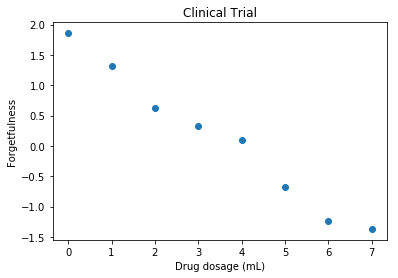

In [92]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x, y)

Initialize the slope parameter $m$ with a "random" value of 0.9...
it is very common for initializing params for the line with some random values to near zero values in ML from simple regression models to complex neural network.

in more sophisticated DL model, there are specific approaches in selecting random values from a specific distribution that is specific to different parts of your deep learning algo

of course the slope looks like negative. we can pick a close slope by eye. the bigger the number we assume, the more impossible is for your machine learning model to fit.  Just keep in mind that sometimes in real world application it is not easy nor it is not appropriate regressions by intuition. As long as you intitialise the value to near zero value (zero also works), you model should make its way to fit the datapoints

(**N.B.**: In this simple demo, we could guess approximately-correct parameter values to start with. Or, we could use an algebraic (e.g., Moore-Penrose pseudoinverse) or statistical (e.g., ordinary-least-squares regression) to solve for the parameters quickly. This tiny machine learning demo with two parameters and eight data points scales, however, to millions of parameters and millions of data points. The other approaches -- guessing, algebra, statistics -- do not come close to scaling in this way.)

only ML approach can be scaled up to for billions of params


In [93]:
m = torch.tensor([0.9]).requires_grad_()
# enable gradient tracking
m

tensor([0.9000], requires_grad=True)

...and do the same for the $y$-intercept parameter $b$: 

In [94]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [95]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [96]:
def regression_plot(my_x, my_y, my_m, my_b):
    
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    # https://www.educba.com/pytorch-detach/
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

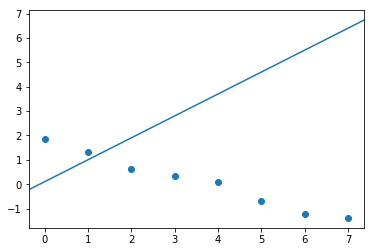

In [97]:
regression_plot(x, y, m, b)

**Return to slides here if following *Calculus I* class.**

next: learn how to fit this line to the data using machine learning. This will involve amethod that allows us to take all of the components of our graph ( the directed acyclic graph)

### Machine Learning
In four easy steps :)

loop through
1. forward pass
2. Compare $\hat{y}$ with true $y$ to calculate cost $C$
3. Use autodiff to calculate gradient of $C$ w.r.t. parameters
4. Gradient descent

to reduce cost and hence gets y closer to $\hat{y}$ 
therefore to find model parameters that can be fit into our data nicely

 **Step 1**: Forward pass

In [98]:
yhat = regression(x, m, b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

There is a PyTorch `MSELoss` method, but let's define it outselves to see how it works. MSE cost is defined by: $$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

MSE: mean square error lost/cost
- by calculating abs value the value will always be positive
- MSE is better than only doing absolute values because it contains difference in values between y and y hat, by squaring the difference, the cost grows exponentially: we tolerate small difference but when the cost increase exponentially when the difference increase


In [99]:
def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2) 
    return sigma/len(my_y)

In [100]:
C = mse(yhat, y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

next aim: reduce cost

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

using chain rule by hand
or backward autodiff method with Pytorch or TensorFlow

In [101]:
C.backward()

In [102]:
m.grad

# the derivative of C wrt to m is +36
# positive slope
# next step is to adjust m to reduce this slope

tensor([36.3050])

In [103]:
b.grad
# the derivative of C wrt to b is 6.26

tensor([6.2650])

**Step 4**: Gradient descent

calls pytorch optimizer module and its function Stochastic gradient descent, which is common method in gradient descent

it passes a list of params intended for adjust
Lr = learning rate; a hyperparam we can fine tune on how much we adjust the params ( subject 8 optimization)

In [104]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [105]:
optimizer.step()
# step method to adjust m and b

Confirm parameters have been adjusted sensibly: 

In [106]:
m
# see m has a new value now
# previous it was 0.9

tensor([0.5369], requires_grad=True)

In [107]:
b

tensor([0.0374], requires_grad=True)

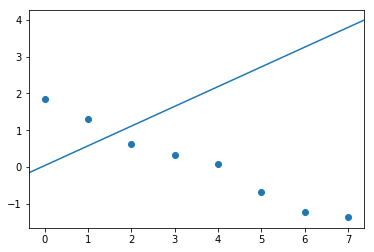

In [108]:
regression_plot(x, y, m, b)
# better a bit. less steep (1 iteration only)

We can repeat steps 1 and 2 to confirm cost has decreased: 

In [109]:
C = mse(regression(x, m, b), y)
C

tensor(8.5722, grad_fn=<DivBackward0>)

Put the 4 steps in a loop to iteratively minimize cost toward zero: 

In [110]:
epochs = 1000
for epoch in range(epochs):
    
    optimizer.zero_grad() 
    # Reset gradients to zero on optimzer
    # else they accumulate cause memory leak
    
    yhat = regression(x, m, b) # Step 1 calculate y hat
    C = mse(yhat, y) # Step 2 calculate cost
    
    C.backward() # Step 3 autodiff to cal the slope of c wrt to m and b (params)
    optimizer.step() # Step 4 gradient descent to adjust m and b for lower cost
    
    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 8.57, m grad 23.2, b grad 3.6
Epoch 1, cost 4.08, m grad 14.8, b grad 1.91
Epoch 2, cost 2.25, m grad 9.49, b grad 0.831
Epoch 3, cost 1.51, m grad 6.11, b grad 0.15
Epoch 4, cost 1.2, m grad 3.96, b grad -0.28
Epoch 5, cost 1.07, m grad 2.59, b grad -0.552
Epoch 6, cost 1.01, m grad 1.72, b grad -0.723
Epoch 7, cost 0.981, m grad 1.17, b grad -0.829
Epoch 8, cost 0.962, m grad 0.82, b grad -0.894
Epoch 9, cost 0.948, m grad 0.595, b grad -0.934
Epoch 10, cost 0.936, m grad 0.452, b grad -0.957
Epoch 11, cost 0.925, m grad 0.361, b grad -0.969
Epoch 12, cost 0.915, m grad 0.302, b grad -0.975
Epoch 13, cost 0.904, m grad 0.265, b grad -0.977
Epoch 14, cost 0.894, m grad 0.241, b grad -0.976
Epoch 15, cost 0.884, m grad 0.225, b grad -0.973
Epoch 16, cost 0.874, m grad 0.214, b grad -0.969
Epoch 17, cost 0.864, m grad 0.207, b grad -0.965
Epoch 18, cost 0.854, m grad 0.202, b grad -0.96
Epoch 19, cost 0.845, m grad 0.199, b grad -0.955
Epoch 20, cost 0.835, m grad 0.196, b

Epoch 319, cost 0.0452, m grad 0.0343, b grad -0.169
Epoch 320, cost 0.0449, m grad 0.0341, b grad -0.168
Epoch 321, cost 0.0446, m grad 0.0339, b grad -0.167
Epoch 322, cost 0.0443, m grad 0.0337, b grad -0.166
Epoch 323, cost 0.044, m grad 0.0335, b grad -0.165
Epoch 324, cost 0.0437, m grad 0.0333, b grad -0.164
Epoch 325, cost 0.0434, m grad 0.0331, b grad -0.163
Epoch 326, cost 0.0432, m grad 0.0329, b grad -0.162
Epoch 327, cost 0.0429, m grad 0.0328, b grad -0.161
Epoch 328, cost 0.0426, m grad 0.0326, b grad -0.16
Epoch 329, cost 0.0424, m grad 0.0324, b grad -0.159
Epoch 330, cost 0.0421, m grad 0.0322, b grad -0.158
Epoch 331, cost 0.0418, m grad 0.032, b grad -0.157
Epoch 332, cost 0.0416, m grad 0.0318, b grad -0.156
Epoch 333, cost 0.0413, m grad 0.0316, b grad -0.156
Epoch 334, cost 0.0411, m grad 0.0315, b grad -0.155
Epoch 335, cost 0.0408, m grad 0.0313, b grad -0.154
Epoch 336, cost 0.0406, m grad 0.0311, b grad -0.153
Epoch 337, cost 0.0403, m grad 0.0309, b grad -0.

Epoch 623, cost 0.0202, m grad 0.00592, b grad -0.0291
Epoch 624, cost 0.0202, m grad 0.00588, b grad -0.0289
Epoch 625, cost 0.0202, m grad 0.00585, b grad -0.0288
Epoch 626, cost 0.0202, m grad 0.00581, b grad -0.0286
Epoch 627, cost 0.0202, m grad 0.00578, b grad -0.0284
Epoch 628, cost 0.0202, m grad 0.00575, b grad -0.0283
Epoch 629, cost 0.0202, m grad 0.00571, b grad -0.0281
Epoch 630, cost 0.0202, m grad 0.00568, b grad -0.0279
Epoch 631, cost 0.0202, m grad 0.00565, b grad -0.0278
Epoch 632, cost 0.0202, m grad 0.00562, b grad -0.0276
Epoch 633, cost 0.0201, m grad 0.00558, b grad -0.0275
Epoch 634, cost 0.0201, m grad 0.00555, b grad -0.0273
Epoch 635, cost 0.0201, m grad 0.00552, b grad -0.0271
Epoch 636, cost 0.0201, m grad 0.00549, b grad -0.027
Epoch 637, cost 0.0201, m grad 0.00545, b grad -0.0268
Epoch 638, cost 0.0201, m grad 0.00542, b grad -0.0267
Epoch 639, cost 0.0201, m grad 0.00539, b grad -0.0265
Epoch 640, cost 0.0201, m grad 0.00536, b grad -0.0264
Epoch 641, 

Epoch 920, cost 0.0195, m grad 0.00106, b grad -0.00522
Epoch 921, cost 0.0195, m grad 0.00106, b grad -0.00519
Epoch 922, cost 0.0195, m grad 0.00105, b grad -0.00516
Epoch 923, cost 0.0195, m grad 0.00104, b grad -0.00513
Epoch 924, cost 0.0195, m grad 0.00104, b grad -0.0051
Epoch 925, cost 0.0195, m grad 0.00103, b grad -0.00507
Epoch 926, cost 0.0195, m grad 0.00103, b grad -0.00504
Epoch 927, cost 0.0195, m grad 0.00102, b grad -0.00502
Epoch 928, cost 0.0195, m grad 0.00101, b grad -0.00499
Epoch 929, cost 0.0195, m grad 0.00101, b grad -0.00496
Epoch 930, cost 0.0195, m grad 0.001, b grad -0.00493
Epoch 931, cost 0.0195, m grad 0.000997, b grad -0.0049
Epoch 932, cost 0.0195, m grad 0.000991, b grad -0.00487
Epoch 933, cost 0.0195, m grad 0.000986, b grad -0.00484
Epoch 934, cost 0.0195, m grad 0.000979, b grad -0.00482
Epoch 935, cost 0.0195, m grad 0.000973, b grad -0.00479
Epoch 936, cost 0.0195, m grad 0.000968, b grad -0.00476
Epoch 937, cost 0.0195, m grad 0.000962, b gra

- cost reduced from 8.57 to 0.0195. in each iteration it gets smaller
- notice that the algo adjusts the slope first then y intercept, until the cost doesnt get better for some iterations more
- epoch is a term for rounds in model training to available data points


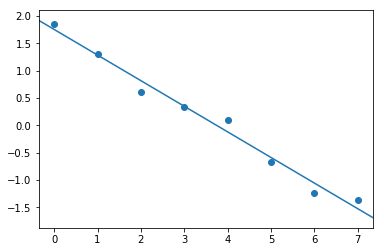

In [116]:
regression_plot(x, y, m, b)
# to confirm

In [115]:
m.item()
# item method

-0.4681258499622345

In [117]:
m

tensor([-0.4681], requires_grad=True)

In [113]:
b.item()

1.7542961835861206

**N.B.**: The model doesn't perfectly approximate the slope (-0.5) and $y$-intercept (2.0) used to simulate the outcomes $y$ at the top of this notebook. This reflects the imperfectness of the sample of eight data points due to adding random noise during the simulation step. In the real world, the best solution would be to sample additional data points: The more data we sample, the more accurate our estimates of the true underlying parameters will be. 

blame the data 